In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
data = pd.read_csv('bank-full.csv', sep=';')

In [5]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
y = data['y']

In [7]:
y = y.replace(['yes','no'],(1,0))
print(y)


0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
45181    0
45182    1
45183    0
45184    0
45185    1
45186    0
45187    1
45188    1
45189    0
45190    1
45191    1
45192    1
45193    1
45194    0
45195    1
45196    1
45197    1
45198    0
45199    0
45200    1
45201    1
45202    1
45203    1
45204    1
45205    1
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64


/home/arya/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


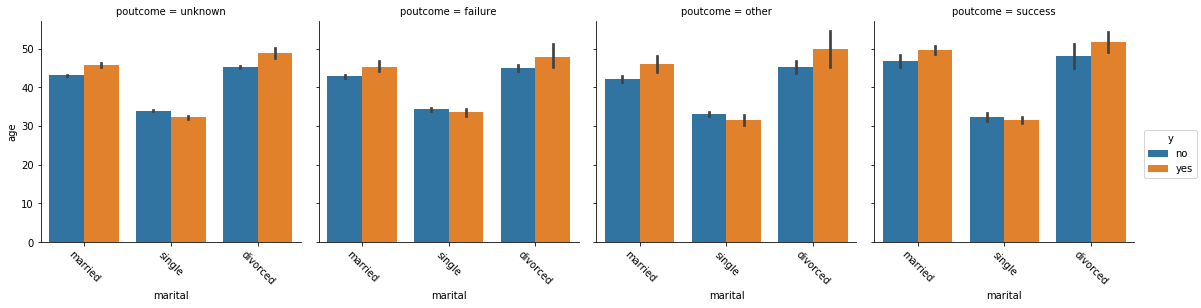

In [8]:
# factor plot
g = sns.factorplot(x = 'marital',
                   y = 'age',
                   data = data,
                   hue = 'y',
                   col = 'poutcome',
                   kind = 'bar')
g.set_xticklabels(rotation =  -45)

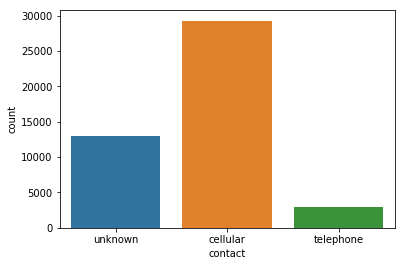

In [9]:
sns.countplot(x='contact', data = data )

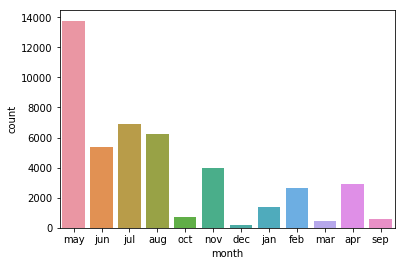

In [10]:
sns.countplot(x = 'month', data = data )

/home/arya/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


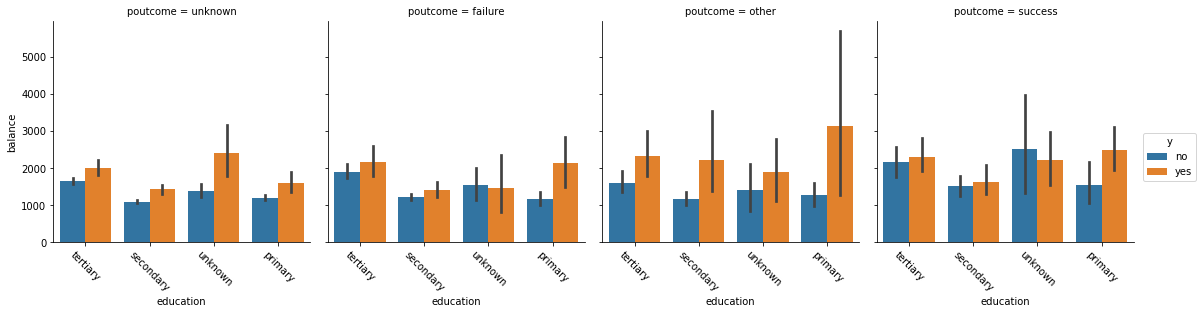

In [11]:
g = sns.factorplot(x = 'education',
                   y = 'balance',
                   data = data,
                   hue = 'y',
                   col = 'poutcome',
                   kind = 'bar')
g.set_xticklabels(rotation =  -45)

In [12]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [13]:
from sklearn import preprocessing 

def encode_features(df_train):
    features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_train[feature])
        df_train[feature] = le.transform(df_train[feature])
    return df_train

In [14]:
data = encode_features(data)

In [15]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,no
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,no
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,no
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,no
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,no


In [16]:
x = data.drop(['y'], axis = 1)

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state= 43)

# Logistic Regression 

In [18]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
logreg = linear_model.LogisticRegression(penalty = 'l1' ,C=0.5)

In [19]:
logreg.fit(x_train, y_train)

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [20]:
y_pred = logreg.predict(x_test)

In [21]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [22]:
cnf = confusion_matrix(y_pred, y_test)
cnf

array([[7809,  829],
       [ 173,  232]])

In [23]:
accuracy_score(y_pred, y_test)

0.8891960632533451

# RandomForest 


In [24]:
from sklearn.ensemble import RandomForestClassifier

/home/arya/anaconda/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [25]:
ranfor = RandomForestClassifier(n_estimators = 100, max_depth=10, random_state=13,criterion='gini')

In [26]:

ranfor.fit(x_train,y_train)



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=13, verbose=0, warm_start=False)

In [27]:


y_pred = ranfor.predict(x_test)



In [28]:
accuracy_score(y_pred, y_test)

0.9077739688156585

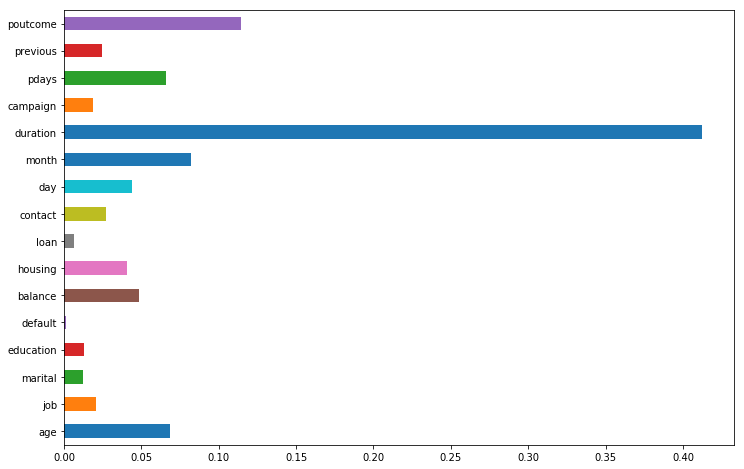

In [29]:
importances=pd.Series(ranfor.feature_importances_, index=x.columns)
importances.plot(kind='barh', figsize=(12,8))

## real data pedriction for all classifiers 

In [30]:
bank_random = pd.read_csv('bank.csv')


In [31]:
bank_random.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [32]:
y_random = bank_random['y']
y_random = y_random.replace(['yes','no'],(1,0))
X_random = bank_random.drop(['y'], axis = 1)
X_random = encode_features(X_random)
y_pred_logreg = logreg.predict(X_random)

In [33]:
y_pred_logreg = logreg.predict(X_random)

In [34]:
accuracy_score(y_pred_logreg,y_random)

0.8882990488829905